In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read and prepare data
df = pd.read_csv("benchmark_metrics.csv", sep=',')
df = df[df['run_ix'] == 'avg']

In [4]:
# Number of tasks per model
total_per_model = df.groupby("model").size()

# Number of successful tasks per model with ratio_success == 1.0
success_per_model = df[df["ratio_success"] == 1.0].groupby("model").size()

In [5]:
total_per_model

model
granite-code:3b     12
granite-code:8b     12
qwen2.5-coder:3b    12
qwen2.5-coder:7b    12
qwen2.5:3b          12
dtype: int64

In [6]:
success_per_model

model
granite-code:3b      2
granite-code:8b      6
qwen2.5-coder:3b     7
qwen2.5-coder:7b    10
qwen2.5:3b           1
dtype: int64

In [7]:
# ratio of successful tasks to total tasks per model
success_ratio = (success_per_model / total_per_model).reset_index()
success_ratio.columns = ["model", "success_ratio"]
success_ratio = success_ratio.sort_values("success_ratio", ascending=False)

In [8]:
success_ratio

,model,success_ratio
3,qwen2.5-coder:7b,0.833333
2,qwen2.5-coder:3b,0.583333
1,granite-code:8b,0.500000
0,granite-code:3b,0.166667
4,qwen2.5:3b,0.083333


C:\Users\bv2504\AppData\Local\Temp\ipykernel_22212\515564801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


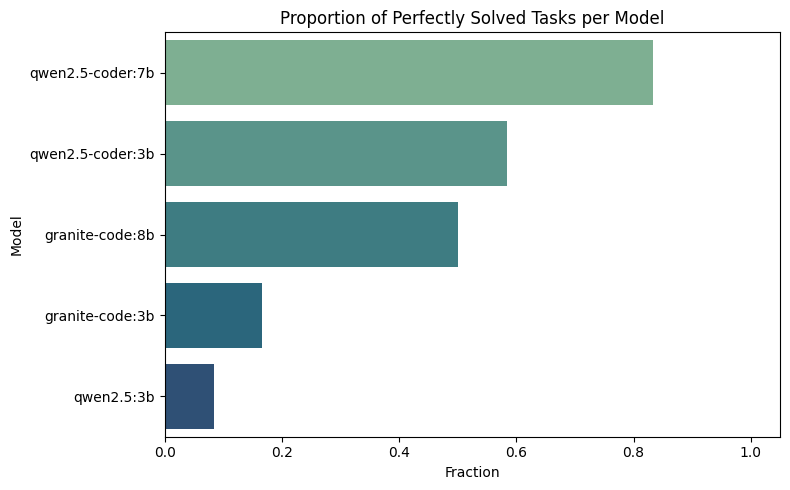

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=success_ratio,
    x="success_ratio",
    y="model",
    palette="crest"
)
plt.xlabel("Fraction")
plt.ylabel("Model")
plt.title("Proportion of Perfectly Solved Tasks per Model")
plt.xlim(0, 1.05)
plt.tight_layout()